# Quais são os fatores mais prejudiciais no trabalho de profissionais de dados e de Inteligência artificial — e quem são os mais afetados?

## Introdução

Este projeto nasceu a partir de uma inquietação recorrente no mercado: profissionais da área de dados, mesmo inseridos em um setor em expansão, vêm demonstrando níveis elevados de insatisfação com aspectos do ambiente de trabalho.

Com base nos microdados da pesquisa State of Data Brazil 2024-2025, conduzida pela comunidade Data Hackers, esta análise busca responder duas perguntas principais:

Quais são os fatores mais frequentemente apontados como prejudiciais à rotina profissional?

Quem são os grupos mais afetados por esses fatores em termos de gênero, cargo, senioridade, idade, entre outros?

Para isso, utilizamos como base principal a coluna 1.f_aspectos_prejudicados, composta por múltiplas escolhas que representam diferentes dores e insatisfações enfrentadas pelos respondentes.

A análise foi conduzida 100% em Python, com apoio de bibliotecas como Pandas, Seaborn e Matplotlib, e estruturada para ser replicável e didática.




## Entendimento do Problema

A insatisfação no trabalho não surge do nada, ela é consequência de fatores recorrentes como pressão excessiva, falta de reconhecimento, ausência de oportunidades ou más relações interpessoais. A coluna 1.f_aspectos_prejudicados nos permite explorar essas causas diretamente pela ótica de quem sente.

Ao observar essas respostas, é possível perceber padrões importantes:

Certos fatores são frequentemente citados em conjunto

Alguns grupos parecem ser mais afetados que outros

Com isso em mente, o objetivo do projeto não é apenas levantar quais fatores são mais comuns, mas mapear com quem eles ocorrem com maior intensidade.

### Objetivo Geral

Identificar os principais fatores prejudiciais à rotina profissional de profissionais de dados no Brasil e analisar quem são os grupos mais afetados por cada um deles.

### Objetivos Específicos

Para alcançar esse objetivo geral, o estudo será guiado pelos seguintes objetivos específicos:

Listar e classificar os aspectos prejudiciais mais citados

Cruzar esses fatores com variáveis de perfil: gênero, cargo e senioridade

Detectar padrões de insatisfação entre diferentes grupos

Levantar hipóteses sobre as possíveis causas desses padrões



## Justificativa

Embora a área de dados esteja em crescimento acelerado, há uma falta de diagnósticos sobre o que prejudica quem faz esse mercado acontecer: os profissionais. Esta análise busca suprir essa lacuna com dados concretos, contribuindo para discussões sobre clima organizacional, retenção de talentos e bem-estar no setor.

Esta análise busca preencher essa lacuna, trazendo evidências concretas que podem:

Auxiliar empresas na construção de ambientes mais saudáveis;

Apoiar profissionais em sua autoavaliação e planejamento de carreira;

Enriquecer a discussão sobre saúde mental, clima organizacional e retenção de talentos no mercado de dados.



## Metodologia

A base utilizada foi a pesquisa State of Data Brazil 2024-2025, de onde foi extraída a coluna '1.f_aspectos_prejudicados'. As respostas já transformadas em variáveis binárias (0 ou 1) permitem uma análise quantitativa.

A partir disso, foram feitas análises exploratórias e cruzamentos com outras variáveis do perfil dos respondentes. O projeto foi desenvolvido em Python (Jupyter Notebook) com as bibliotecas voltadas para Análise de Dados.

A metodologia adotada neste projeto é de natureza quantitativa e exploratória, com base em dados secundários da pesquisa State of Data Brazil 2024/2025.

As estapas do projeto são:
• Introdução

• Entendimento do Problema

• Objetivo Geral e Objetivos Específicos

• Justificativa

• Metodologia

• Importação das Bibliotecas e Carregamento dos Dados

• Exploração Inicial (shape, info, head, describe)

• Padronização e Limpeza

• Organização por Grupos Temáticos

• Análise Exploratória (EDA)

• Geração de Insights

• Visualizações

• Conclusões e Recomendações

Importação das Bibliotecas e Carregamento dos Dados

Aqui nesta etapa iremos dar os primeiros passos com o datasets, importar as bibilotecas utilizadas e carregar os dados, além de dar as primeiras vizualições nas informações disponíveis.

In [2]:
#Bibliotecas que serão usadas neste projeto
import kagglehub
import shutil
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


c:\Users\GUILHERME\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Carregamento do Dataset via api
# Download latest version
path = kagglehub.dataset_download("datahackers/state-of-data-brazil-20242025")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\GUILHERME\.cache\kagglehub\datasets\datahackers\state-of-data-brazil-20242025\versions\1


In [4]:
#Carregando o dataset em um dataframe
arquivo = os.path.join(path, "Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")
df = pd.read_csv(arquivo)

Vamos observar mais de perto todas as colunas que temos para trabalhar

In [5]:
for col in df.columns:
    print(col)

0.a_token
0.d_data/hora_envio
1.a_idade
1.a.1_faixa_idade
1.b_genero
1.c_cor/raca/etnia
1.d_pcd
1.e_experiencia_profissional_prejudicada
1.e.1_Não acredito que minha experiência profissional seja afetada
1.e.2_Sim, devido a minha Cor/Raça/Etnia
1.e.3_Sim, devido a minha identidade de gênero
1.e.4_Sim, devido ao fato de ser PCD
1.i.1_uf_onde_mora
1.f.1_Quantidade de oportunidades de emprego/vagas recebidas
1.f.2_Senioridade das vagas recebidas em relação à sua experiência
1.f.3_Aprovação em processos seletivos/entrevistas
1.f.4_Oportunidades de progressão de carreira
1.f.5_Velocidade de progressão de carreira
1.f.6_Nível de cobrança no trabalho/Stress no trabalho
1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias
1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho
1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho
1.i.2_regiao_onde_mora
1.f_aspectos_prejudicados
1.k.1_uf_de_origem
1.k.2_regiao_de_o

Notamos que muitas colunas são foram separadas e transformadas em colunas binárias a uma coluna chefe

vamos analisar somente as colunas que tem seu indentificador sem um indentificador de alternativa.

In [6]:
# Lista de colunas que seguem o padrão número.letra_
colunas_filtradas = df.columns[df.columns.str.contains(r"^\d+\.[a-z]\_", regex=True)].tolist()

# Mostra a lista
for col in colunas_filtradas:
    print(col)

0.a_token
0.d_data/hora_envio
1.a_idade
1.b_genero
1.c_cor/raca/etnia
1.d_pcd
1.e_experiencia_profissional_prejudicada
1.f_aspectos_prejudicados
1.g_vive_no_brasil
1.h_pais_onde_mora
1.i_estado_onde_mora
1.j_vive_no_estado_de_formacao
1.k_estado_de_origem
1.l_nivel_de_ensino
1.m_área_de_formação
2.a_situação_de_trabalho
2.b_setor
2.c_numero_de_funcionarios
2.d_atua_como_gestor
2.e_cargo_como_gestor
2.f_cargo_atual
2.g_nivel
2.h_faixa_salarial
2.i_tempo_de_experiencia_em_dados
2.j_tempo_de_experiencia_em_ti
2.k_satisfeito_atualmente
2.l_motivo_insatisfacao
2.m_participou_de_entrevistas_ultimos_6m
2.n_planos_de_mudar_de_emprego_6m
2.o_criterios_para_escolha_de_emprego
2.q_empresa_passou_por_layoff_em_2024
2.r_modelo_de_trabalho_atual
2.s_modelo_de_trabalho_ideal
2.t_atitude_em_caso_de_retorno_presencial
3.a_numero_de_pessoas_em_dados
3.b_cargos_no_time_de_dados_da_empresa
3.c_responsabilidades_como_gestor
3.d_desafios_como_gestor
3.e_ai_generativa_e_llm_é_uma_prioridade?
3.f_tipo_de_uso_

Exploração Inicial

Abaixo uma lista de colunas que queremos usar, descartamos colunas como "3.g_motivos_para_não_usar_ai_generativa_e_llm" e "1.j_vive_no_estado_de_formacao" e suas alternativas pois não será necessária na análise 

In [7]:
#1.a_idade
# 1.b_genero
# 1.c_cor/raca/etnia
# 1.d_pcd
# 1.e_experiencia_profissional_prejudicada
# 1.f_aspectos_prejudicados
# 1.g_vive_no_brasil
# 1.h_pais_onde_mora
# 1.i_estado_onde_mora
# 1.k_estado_de_origem
# 1.l_nivel_de_ensino
# 1.m_área_de_formação
# 2.a_situação_de_trabalho
# 2.b_setor
# 2.e_cargo_como_gestor
# 2.f_cargo_atual
# 2.g_nivel
# 2.h_faixa_salarial
# 2.i_tempo_de_experiencia_em_dados
# 2.j_tempo_de_experiencia_em_ti
# 2.k_satisfeito_atualmente
# 2.l_motivo_insatisfacao
# 2.m_participou_de_entrevistas_ultimos_6m
# 2.n_planos_de_mudar_de_emprego_6m
# 2.o_criterios_para_escolha_de_emprego
# 2.r_modelo_de_trabalho_atual
# 2.s_modelo_de_trabalho_ideal
# 2.t_atitude_em_caso_de_retorno_presencial
# 3.c_responsabilidades_como_gestor
# 3.d_desafios_como_gestor
# 4.a_funcao_de_atuacao
# 4.b_fontes_de_dados_(dia_a_dia)
# 4.c_fonte_de_dado_mais_usada
# 4.d_linguagem_de_programacao_(dia_a_dia)
# 4.e_linguagem_mais_usada
# 4.f_linguagem_preferida
# 4.g_banco_de_dados_(dia_a_dia)
# 4.h_cloud_(dia_a_dia)
# 4.i_cloud_preferida
# 4.j_ferramenta_de_bi_(dia_a_dia)
# 4.k_ferramenta_de_bi_preferida
# 4.l_tipo_de_uso_de_ai_generativa_e_llm_na_empresa
# 4.m_usa_chatgpt_ou_copilot_no_trabalho?
# 5.a_objetivo_na_area_de_dados
# 5.b_oportunidade_buscada
# 5.c_tempo_em_busca_de_oportunidade
# 5.d_experiencia_em_processos_seletivos
# 6.a_rotina_como_de
# 6.b_ferramentas_etl_de
# 6.c_possui_data_lake
# 6.d_tecnologia_data_lake
# 6.e_possui_data_warehouse
# 6.f_tecnologia_data_warehouse
# 6.g_ferramentas_de_qualidade_de_dados_(dia_a_dia)
# 6.h_maior_tempo_gasto_como_de
# 7.a_rotina_como_da
# 7.b_ferramentas_etl_da
# 7.c_ferramentas_autonomia_area_de_negocios
# 7.d_maior_tempo_gasto_como_da
# 8.a_rotina_como_ds
# 8.b_tecnicas_e_metodos_ds
# 8.c_tecnologias_ds
# 8.d_maior_tempo_gasto_como_ds

Aqui serão adicionados os prefixos que iremos usar, os demais serão deixados no dataframe original.

In [8]:
# Lista dos prefixos principais que usaremos
prefixos = [
    "0.d", "1.a", "1.b", "1.c", "1.d", "1.e", "1.f", "1.g", "1.i", "1.k", "1.l", "1.m",
    "2.a", "2.b", "2.c", "2.d", "2.e", "2.f", "2.g", "2.h", "2.i", "2.j", "2.k", "2.l", "2.m", "2.n", "2.o", "2.r", "2.s", "2.t",
    "3.c", "3.d", "3.b",
    "4.a", "4.d", "4.f", "4.m",
    "5.a", "5.b", "5.d",
    "6.a", "6.b", "6.c", "6.d", "6.e", "6.f", "6.g",
    "7.a", "7.b", "7.c", "7.d",
    "8.a", "8.b", "8.c"
]

# Filtrar as colunas do DataFrame que começam com qualquer desses prefixos
colunas_selecionadas = [
    col for col in df.columns
    if any(col.startswith(prefix + '.') or col.startswith(prefix + '_') for prefix in prefixos)
]

# Criar novo DataFrame apenas com essas colunas
df = df[colunas_selecionadas]

In [9]:
df.shape

(5217, 263)

Agora iremos ver os tipos de dados que temos em cada coluna

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

0.d_data/hora_envio                                                                                                                                                                                     object
1.a_idade                                                                                                                                                                                                int64
1.a.1_faixa_idade                                                                                                                                                                                       object
1.b_genero                                                                                                                                                                                              object
1.c_cor/raca/etnia                                                                                                                                                          

####  Analisando a coluna de Data

In [11]:
df['0.d_data/hora_envio']

0       16/10/2024 11:19:17
1       16/10/2024 20:45:31
2       17/10/2024 18:10:59
3       22/10/2024 18:03:00
4       23/10/2024 01:33:23
               ...         
5212    09/12/2024 22:19:07
5213    10/12/2024 00:36:11
5214    14/10/2024 10:12:58
5215    17/10/2024 20:51:27
5216    01/12/2024 08:45:38
Name: 0.d_data/hora_envio, Length: 5217, dtype: object

Notamos que ela está fora do padrão datetime então vamos convertelá

In [12]:
df['0.d_data/hora_envio'] = pd.to_datetime(df['0.d_data/hora_envio'], format='%d/%m/%Y %H:%M:%S')

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.i.1_uf_onde_mora,1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho",1.i.2_regiao_onde_mora,1.f_aspectos_prejudicados,1.k.1_uf_de_origem,1.k.2_regiao_de_origem,1.g_vive_no_brasil,1.i_estado_onde_mora,1.k_estado_de_origem,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial,3.b_cargos_no_time_de_dados_da_empresa,3.b.1_Analytics Engineer,3.b.2_Engenharia de Dados/Data Engineer,3.b.3_Analista de Dados/Data Analyst,3.b.4_Cientista de Dados/Data Scientist,3.b.5_Database Administrator/DBA,3.b.6_Analista de Business Intelligence/BI,3.b.7_Arquiteto de Dados/Data Architect,3.b.8_Data Product Manager/DPM,3.b.9_Business Analyst,3.b.10_ML Engineer/AI Engineer,3.c_responsabilidades_como_gestor,3.c.1_Pensar na visão de longo prazo de dados,3.c.2_Organização de treinamentos e iniciativas,"3.c.3_Atração, seleção e contratação",3.c.4_Decisão sobre contratação de ferramentas,3.c.5_gestor da equipe de engenharia de dados,"3.c.6_gestor da equipe de estudos, relatórios",3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning,3.c.8_Apesar de ser gestor ainda atuo na parte técnica,3.c.9_Gestão de projetos de dados,3.c.10_Gestão de produtos de dados,3.c.11_Gestão de pessoas,3.d_desafios_como_gestor,3.d.1_Contratar talentos,3.d.2_Reter talentos,3.d.3_Convencer a empresa a aumentar investimentos,3.d.4_Gestão de equipes no ambiente remoto,3.d.5_Gestão de projetos envolvendo áreas multidisciplinares,3.d.6_Organizar as informações com qualidade e confiabilidade,3.d.7_Processar e armazenar um alto volume de dados,3.d.8_Gerar valor para as áreas de negócios,3.d.9_Desenvolver e manter modelos Machine Learning em produção,3.d.10_Gerenciar a expectativa das áreas,3.d.11_Garantir a manutenção dos projetos e modelos em produção,3.d.12_Conseguir levar inovação para a empresa,3.d.13_Garantir (ROI) em projetos de dado

In [15]:
df.shape

(5217, 263)

In [16]:
df = df[~df['1.b_genero'].isin(['Outro', 'Prefiro não informar'])]
df.shape


(5194, 263)

Vamos dar continuida ao tratamento, notei que as colunas tranformadas em binários(0 e 1) estão no formato float vou deixar assim, pois mesmo sabendo que perco velocidade no tratamento posso usar o formato para fazer analises númericas ou verdadeiro/falso


Com as colunas que temos vamos excluir as duplicatas

In [17]:
df.drop_duplicates()

,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.i.1_uf_onde_mora,1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho",1.i.2_regiao_onde_mora,1.f_aspectos_prejudicados,1.k.1_uf_de_origem,1.k.2_regiao_de_origem,1.g_vive_no_brasil,1.i_estado_onde_mora,1.k_estado_de_origem,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial,3.b_cargos_no_time_de_dados_da_empresa,3.b.1_Analytics Engineer,3.b.2_Engenharia de Dados/Data Engineer,3.b.3_Analista de Dados/Data Analyst,3.b.4_Cientista de Dados/Data Scientist,3.b.5_Database Administrator/DBA,3.b.6_Analista de Business Intelligence/BI,3.b.7_Arquiteto de Dados/Data Architect,3.b.8_Data Product Manager/DPM,3.b.9_Business Analyst,3.b.10_ML Engineer/AI Engineer,3.c_responsabilidades_como_gestor,3.c.1_Pensar na visão de longo prazo de dados,3.c.2_Organização de treinamentos e iniciativas,"3.c.3_Atração, seleção e contratação",3.c.4_Decisão sobre contratação de ferramentas,3.c.5_gestor da equipe de engenharia de dados,"3.c.6_gestor da equipe de estudos, relatórios",3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning,3.c.8_Apesar de ser gestor ainda atuo na parte técnica,3.c.9_Gestão de projetos de dados,3.c.10_Gestão de produtos de dados,3.c.11_Gestão de pessoas,3.d_desafios_como_gestor,3.d.1_Contratar talentos,3.d.2_Reter talentos,3.d.3_Convencer a empresa a aumentar investimentos,3.d.4_Gestão de equipes no ambiente remoto,3.d.5_Gestão de projetos envolvendo áreas multidisciplinares,3.d.6_Organizar as informações com qualidade e confiabilidade,3.d.7_Processar e armazenar um alto volume de dados,3.d.8_Gerar valor para as áreas de negócios,3.d.9_Desenvolver e manter modelos Machine Learning em produção,3.d.10_Gerenciar a expectativa das áreas,3.d.11_Garantir a manutenção dos projetos e modelos em produção,3.d.12_Conseguir levar inovação para a empresa,3.d.13_Garantir (ROI) em projetos de dado

Vamos padronizar as colunas no formato object para uma melhor análise

In [18]:
for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].astype(str).str.strip().str.lower()
  

df.replace('nan', np.nan, inplace=True)



Durante esta parte entrei em um dilema, excluir as respostas em brancos da coluna 1.f e 1.e que vou usar para o projeto? Ou deixar e usar como pessoas que não responderam? 
Na coluna 1.e que se trata sobre pessoas com experiência profissional prejudicada tem algumas com respostas Sim e Não oque é ótimo para tratar mas muitas não responderam então irei criar colocar um valor como "Optou por não responder" nas colunas e em suas variações binárias adicionar uma nova coluna.
Há também pessoas que se contradizem nas respostas dizendo que sim e não, estas eu irei excluir por motivos de falta de compreensão do que a pessoa qui dizer com isso


Vamos começar fazendo a exclusão das respostas sim e não

In [19]:
Respostas_contraditorias = [
    'Sim, acredito que a minha a experiência profissional seja afetada devido a minha Cor/Raça/Etnia, Não acredito que minha experiência profissional seja afetada devido a esses fatores',
    'Não acredito que minha experiência profissional seja afetada devido a esses fatores, Sim, acredito que a minha a experiência profissional seja afetada devido a minha Cor/Raça/Etnia',
    'Não acredito que minha experiência profissional seja afetada devido a esses fatores, Sim, acredito que a minha a experiência profissional seja afetada devido a minha Cor/Raça/Etnia, Sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero',
    'Sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero, Não acredito que minha experiência profissional seja afetada devido a esses fatores',
    'Não acredito que minha experiência profissional seja afetada devido a esses fatores, Sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero',
    'Sim, acredito que a minha a experiência profissional seja afetada devido a minha Cor/Raça/Etnia, Sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero, Não acredito que minha experiência profissional seja afetada devido a esses fatores',
    'Sim, acredito que minha experiência profissional seja afetada devido ao fato de ser PCD, Não acredito que minha experiência profissional seja afetada devido a esses fatores'
]

Respostas_contraditorias = [resp.lower() for resp in Respostas_contraditorias]

In [20]:
df = df[~df['1.e_experiencia_profissional_prejudicada'].isin(Respostas_contraditorias)]

In [21]:
display(df)

,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.i.1_uf_onde_mora,1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho",1.i.2_regiao_onde_mora,1.f_aspectos_prejudicados,1.k.1_uf_de_origem,1.k.2_regiao_de_origem,1.g_vive_no_brasil,1.i_estado_onde_mora,1.k_estado_de_origem,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial,3.b_cargos_no_time_de_dados_da_empresa,3.b.1_Analytics Engineer,3.b.2_Engenharia de Dados/Data Engineer,3.b.3_Analista de Dados/Data Analyst,3.b.4_Cientista de Dados/Data Scientist,3.b.5_Database Administrator/DBA,3.b.6_Analista de Business Intelligence/BI,3.b.7_Arquiteto de Dados/Data Architect,3.b.8_Data Product Manager/DPM,3.b.9_Business Analyst,3.b.10_ML Engineer/AI Engineer,3.c_responsabilidades_como_gestor,3.c.1_Pensar na visão de longo prazo de dados,3.c.2_Organização de treinamentos e iniciativas,"3.c.3_Atração, seleção e contratação",3.c.4_Decisão sobre contratação de ferramentas,3.c.5_gestor da equipe de engenharia de dados,"3.c.6_gestor da equipe de estudos, relatórios",3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning,3.c.8_Apesar de ser gestor ainda atuo na parte técnica,3.c.9_Gestão de projetos de dados,3.c.10_Gestão de produtos de dados,3.c.11_Gestão de pessoas,3.d_desafios_como_gestor,3.d.1_Contratar talentos,3.d.2_Reter talentos,3.d.3_Convencer a empresa a aumentar investimentos,3.d.4_Gestão de equipes no ambiente remoto,3.d.5_Gestão de projetos envolvendo áreas multidisciplinares,3.d.6_Organizar as informações com qualidade e confiabilidade,3.d.7_Processar e armazenar um alto volume de dados,3.d.8_Gerar valor para as áreas de negócios,3.d.9_Desenvolver e manter modelos Machine Learning em produção,3.d.10_Gerenciar a expectativa das áreas,3.d.11_Garantir a manutenção dos projetos e modelos em produção,3.d.12_Conseguir levar inovação para a empresa,3.d.13_Garantir (ROI) em projetos de dado

In [22]:
df['1.f_aspectos_prejudicados'].unique()


array([nan,
       'quantidade de oportunidades de emprego/vagas recebidas, aprovação em processos seletivos/entrevistas, velocidade de progressão de carreira',
       'quantidade de oportunidades de emprego/vagas recebidas, aprovação em processos seletivos/entrevistas',
       'relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho, atenção dada pelas pessoas diante das minhas opiniões e ideias',
       'quantidade de oportunidades de emprego/vagas recebidas',
       'quantidade de oportunidades de emprego/vagas recebidas, aprovação em processos seletivos/entrevistas, oportunidades de progressão de carreira, velocidade de progressão de carreira, nível de cobrança no trabalho / stress no trabalho',
       'senioridade das vagas recebidas em relação à sua experiência',
       'atenção dada pelas pessoas diante das minhas opiniões e ideias, nível de cobrança no trabalho / stress no trabalho',
       'quantidade de oportunidades de emprego/vaga

In [23]:
df['1.f_aspectos_prejudicados'] = df['1.f_aspectos_prejudicados'].fillna('não respondeu')
df['1.e_experiencia_profissional_prejudicada'] = df['1.e_experiencia_profissional_prejudicada'].fillna('não respondeu')


In [24]:
df.head()

,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.i.1_uf_onde_mora,1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho",1.i.2_regiao_onde_mora,1.f_aspectos_prejudicados,1.k.1_uf_de_origem,1.k.2_regiao_de_origem,1.g_vive_no_brasil,1.i_estado_onde_mora,1.k_estado_de_origem,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial,3.b_cargos_no_time_de_dados_da_empresa,3.b.1_Analytics Engineer,3.b.2_Engenharia de Dados/Data Engineer,3.b.3_Analista de Dados/Data Analyst,3.b.4_Cientista de Dados/Data Scientist,3.b.5_Database Administrator/DBA,3.b.6_Analista de Business Intelligence/BI,3.b.7_Arquiteto de Dados/Data Architect,3.b.8_Data Product Manager/DPM,3.b.9_Business Analyst,3.b.10_ML Engineer/AI Engineer,3.c_responsabilidades_como_gestor,3.c.1_Pensar na visão de longo prazo de dados,3.c.2_Organização de treinamentos e iniciativas,"3.c.3_Atração, seleção e contratação",3.c.4_Decisão sobre contratação de ferramentas,3.c.5_gestor da equipe de engenharia de dados,"3.c.6_gestor da equipe de estudos, relatórios",3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning,3.c.8_Apesar de ser gestor ainda atuo na parte técnica,3.c.9_Gestão de projetos de dados,3.c.10_Gestão de produtos de dados,3.c.11_Gestão de pessoas,3.d_desafios_como_gestor,3.d.1_Contratar talentos,3.d.2_Reter talentos,3.d.3_Convencer a empresa a aumentar investimentos,3.d.4_Gestão de equipes no ambiente remoto,3.d.5_Gestão de projetos envolvendo áreas multidisciplinares,3.d.6_Organizar as informações com qualidade e confiabilidade,3.d.7_Processar e armazenar um alto volume de dados,3.d.8_Gerar valor para as áreas de negócios,3.d.9_Desenvolver e manter modelos Machine Learning em produção,3.d.10_Gerenciar a expectativa das áreas,3.d.11_Garantir a manutenção dos projetos e modelos em produção,3.d.12_Conseguir levar inovação para a empresa,3.d.13_Garantir (ROI) em projetos de dado

In [25]:
#Vamos adicionar o valor de 0 nas colunas dummies dessas duas colunas
col_dum = [col for col in df.columns if col.startswith('1.e.') or col.startswith('1.f.')]
df[col_dum] = df[col_dum].fillna(0.0)

In [26]:
df.head()

,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.i.1_uf_onde_mora,1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho",1.i.2_regiao_onde_mora,1.f_aspectos_prejudicados,1.k.1_uf_de_origem,1.k.2_regiao_de_origem,1.g_vive_no_brasil,1.i_estado_onde_mora,1.k_estado_de_origem,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial,3.b_cargos_no_time_de_dados_da_empresa,3.b.1_Analytics Engineer,3.b.2_Engenharia de Dados/Data Engineer,3.b.3_Analista de Dados/Data Analyst,3.b.4_Cientista de Dados/Data Scientist,3.b.5_Database Administrator/DBA,3.b.6_Analista de Business Intelligence/BI,3.b.7_Arquiteto de Dados/Data Architect,3.b.8_Data Product Manager/DPM,3.b.9_Business Analyst,3.b.10_ML Engineer/AI Engineer,3.c_responsabilidades_como_gestor,3.c.1_Pensar na visão de longo prazo de dados,3.c.2_Organização de treinamentos e iniciativas,"3.c.3_Atração, seleção e contratação",3.c.4_Decisão sobre contratação de ferramentas,3.c.5_gestor da equipe de engenharia de dados,"3.c.6_gestor da equipe de estudos, relatórios",3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning,3.c.8_Apesar de ser gestor ainda atuo na parte técnica,3.c.9_Gestão de projetos de dados,3.c.10_Gestão de produtos de dados,3.c.11_Gestão de pessoas,3.d_desafios_como_gestor,3.d.1_Contratar talentos,3.d.2_Reter talentos,3.d.3_Convencer a empresa a aumentar investimentos,3.d.4_Gestão de equipes no ambiente remoto,3.d.5_Gestão de projetos envolvendo áreas multidisciplinares,3.d.6_Organizar as informações com qualidade e confiabilidade,3.d.7_Processar e armazenar um alto volume de dados,3.d.8_Gerar valor para as áreas de negócios,3.d.9_Desenvolver e manter modelos Machine Learning em produção,3.d.10_Gerenciar a expectativa das áreas,3.d.11_Garantir a manutenção dos projetos e modelos em produção,3.d.12_Conseguir levar inovação para a empresa,3.d.13_Garantir (ROI) em projetos de dado

In [27]:
#Vamos criar as duas novas colunas dumies
df['1.e.5_não_respondeu'] = (df['1.e_experiencia_profissional_prejudicada'] == 'não respondeu').astype(float)
df['1.f.10_não_respondeu'] = (df['1.f_aspectos_prejudicados'] == 'não respondeu').astype(float)


In [28]:
df.head()

,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.i.1_uf_onde_mora,1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,1.f.6_Nível de cobrança no trabalho/Stress no trabalho,1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias,"1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho","1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho",1.i.2_regiao_onde_mora,1.f_aspectos_prejudicados,1.k.1_uf_de_origem,1.k.2_regiao_de_origem,1.g_vive_no_brasil,1.i_estado_onde_mora,1.k_estado_de_origem,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.d_atua_como_gestor,2.e_cargo_como_gestor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.k_satisfeito_atualmente,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,2.o_criterios_para_escolha_de_emprego,2.o.1_Remuneração/Salário,2.o.2_Benefícios,2.o.3_Propósito do trabalho e da empresa,2.o.4_Flexibilidade de trabalho remoto,2.o.5_Ambiente e clima de trabalho,2.o.6_Oportunidade de aprendizado e trabalhar com referências,2.o.7_Plano de carreira e oportunidades de crescimento,2.o.8_Maturidade da empresa em termos de tecnologia e dados,2.o.9_Qualidade dos gestores e líderes,2.o.10_Reputação que a empresa tem no mercado,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal,2.t_atitude_em_caso_de_retorno_presencial,3.b_cargos_no_time_de_dados_da_empresa,3.b.1_Analytics Engineer,3.b.2_Engenharia de Dados/Data Engineer,3.b.3_Analista de Dados/Data Analyst,3.b.4_Cientista de Dados/Data Scientist,3.b.5_Database Administrator/DBA,3.b.6_Analista de Business Intelligence/BI,3.b.7_Arquiteto de Dados/Data Architect,3.b.8_Data Product Manager/DPM,3.b.9_Business Analyst,3.b.10_ML Engineer/AI Engineer,3.c_responsabilidades_como_gestor,3.c.1_Pensar na visão de longo prazo de dados,3.c.2_Organização de treinamentos e iniciativas,"3.c.3_Atração, seleção e contratação",3.c.4_Decisão sobre contratação de ferramentas,3.c.5_gestor da equipe de engenharia de dados,"3.c.6_gestor da equipe de estudos, relatórios",3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning,3.c.8_Apesar de ser gestor ainda atuo na parte técnica,3.c.9_Gestão de projetos de dados,3.c.10_Gestão de produtos de dados,3.c.11_Gestão de pessoas,3.d_desafios_como_gestor,3.d.1_Contratar talentos,3.d.2_Reter talentos,3.d.3_Convencer a empresa a aumentar investimentos,3.d.4_Gestão de equipes no ambiente remoto,3.d.5_Gestão de projetos envolvendo áreas multidisciplinares,3.d.6_Organizar as informações com qualidade e confiabilidade,3.d.7_Processar e armazenar um alto volume de dados,3.d.8_Gerar valor para as áreas de negócios,3.d.9_Desenvolver e manter modelos Machine Learning em produção,3.d.10_Gerenciar a expectativa das áreas,3.d.11_Garantir a manutenção dos projetos e modelos em produção,3.d.12_Conseguir levar inovação para a empresa,3.d.13_Garantir (ROI) em projetos de dado

Organização por Grupos Temáticos 

Agora iremos começar as análiese para isso irei separar em dois grupos, irei criar um novo dataframe que irá conter os valores de todas as pessoas que fizeram parte do questionamento para que futuramente, vejamos a comparação de pessoas que se sintam afetadas e das que não - no outro dataframe(principal) irei excluir as pessoas que não responderam para explorar apenas as pessoas que relataram que se sentiram afetadas.

In [29]:
#Criação do df_todos que irá conter todas as pessoas que responderam
df_todos = df.copy()

df_todos.head

<bound method NDFrame.head of      0.d_data/hora_envio  1.a_idade 1.a.1_faixa_idade 1.b_genero  \
0    2024-10-16 11:19:17         18             17-21  masculino   
1    2024-10-16 20:45:31         18             17-21  masculino   
2    2024-10-17 18:10:59         18             17-21  masculino   
3    2024-10-22 18:03:00         18             17-21  masculino   
4    2024-10-23 01:33:23         18             17-21  masculino   
...                  ...        ...               ...        ...   
5212 2024-12-09 22:19:07         66               55+   feminino   
5213 2024-12-10 00:36:11         66               55+  masculino   
5214 2024-10-14 10:12:58         68               55+   feminino   
5215 2024-10-17 20:51:27         68               55+  masculino   
5216 2024-12-01 08:45:38         68               55+   feminino   

     1.c_cor/raca/etnia 1.d_pcd  \
0                branca     não   
1                branca     não   
2                 parda     não   
3            

In [30]:
remover = 'não respondeu'

df.replace(remover, np.nan, inplace= True)
df.dropna(subset=['1.f_aspectos_prejudicados'], inplace=True)
df.drop(['1.f.10_não_respondeu'], axis=1, inplace=True)


In [31]:
df_todos.shape

(5163, 265)

In [32]:
df.shape

(1275, 264)

Análise Exploratória (EDA)

Chegamos ao ponto ápice do projeto, a Análise Exploratória - aqui pretendo apresentar estudos como análise racial, por gênero, faixa salaria, cargo, aspectos pessoais e profissionais, criar correlações e aprensetar informações ocultas dos dados.

A primeira análise que irei fazer será comparando o número de pessoas que se sentem afetadas de acordo com a coluna 1.f_aspectos_prejudicados, entre as respostas eu irei dividar como respondeu e não respondeu.

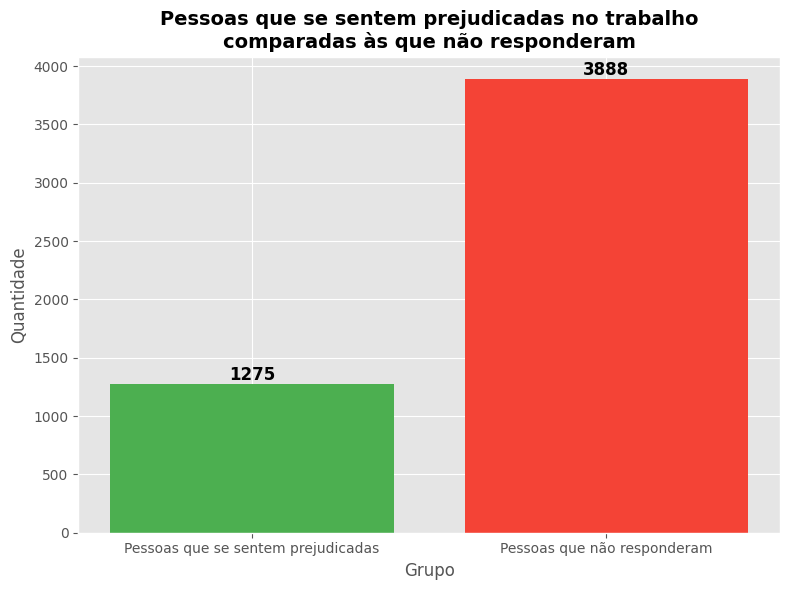

In [33]:
#Indentificando os que responderam e os que não
nao_respondeu = df_todos[df_todos['1.f_aspectos_prejudicados'] == 'não respondeu']
respondeu =  df[df['1.f_aspectos_prejudicados'].isin(df_todos['1.f_aspectos_prejudicados'])]

#Valores do gráfico de barras
valores_respondeu_1f = len(respondeu)
valores_nao_respondeu_1f = len(nao_respondeu)
valores_resposta = [valores_respondeu_1f,  valores_nao_respondeu_1f]
categorias = ['Pessoas que se sentem prejudicadas', 'Pessoas que não responderam']

# Estilo visual
plt.style.use('ggplot')  # ou 'seaborn', 'bmh', 'fivethirtyeight'

fig, ax = plt.subplots(figsize=(8, 6))

# Cria as barras
barras = ax.bar(categorias, valores_resposta, color=['#4CAF50', '#F44336'])

# Adiciona os valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{int(altura)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Títulos e rótulos
ax.set_title('Pessoas que se sentem prejudicadas no trabalho\ncomparadas às que não responderam', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xlabel('Grupo', fontsize=12)

# Ajuste fino de layout
plt.tight_layout()
plt.show()

In [34]:
#Vamos mostrar um comparativo com percentual de respostas 
print(f'O valor em % das pessoas que responderam é: {(valores_respondeu_1f / len(df_todos["1.f_aspectos_prejudicados"])) * 100:.2f}% ')
print(f'O valor em % das pessoas que não responderam é: {(valores_nao_respondeu_1f / len(df_todos["1.f_aspectos_prejudicados"])) * 100:.2f}% ')

O valor em % das pessoas que responderam é: 24.69% 
O valor em % das pessoas que não responderam é: 75.31% 


O próximo passo é começarmos a ver os tipos de aspectos a qual as pessoas se sentem prejudicadas

In [35]:
# Filtra as colunas dummies da 1.f (que começam com '1.f')
colunas_1f_dummies = [col for col in df.columns if col.startswith('1.f.') and col != '1.f_aspectos_prejudicados']



In [36]:
valores_resposta_1 = df[colunas_1f_dummies].sum().values
categorias_1 = [col.replace('1.f.', '') for col in colunas_1f_dummies]

In [37]:
print(valores_resposta_1)

[496. 457. 473. 666. 711. 354. 711. 373. 311.]


C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\258851766.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


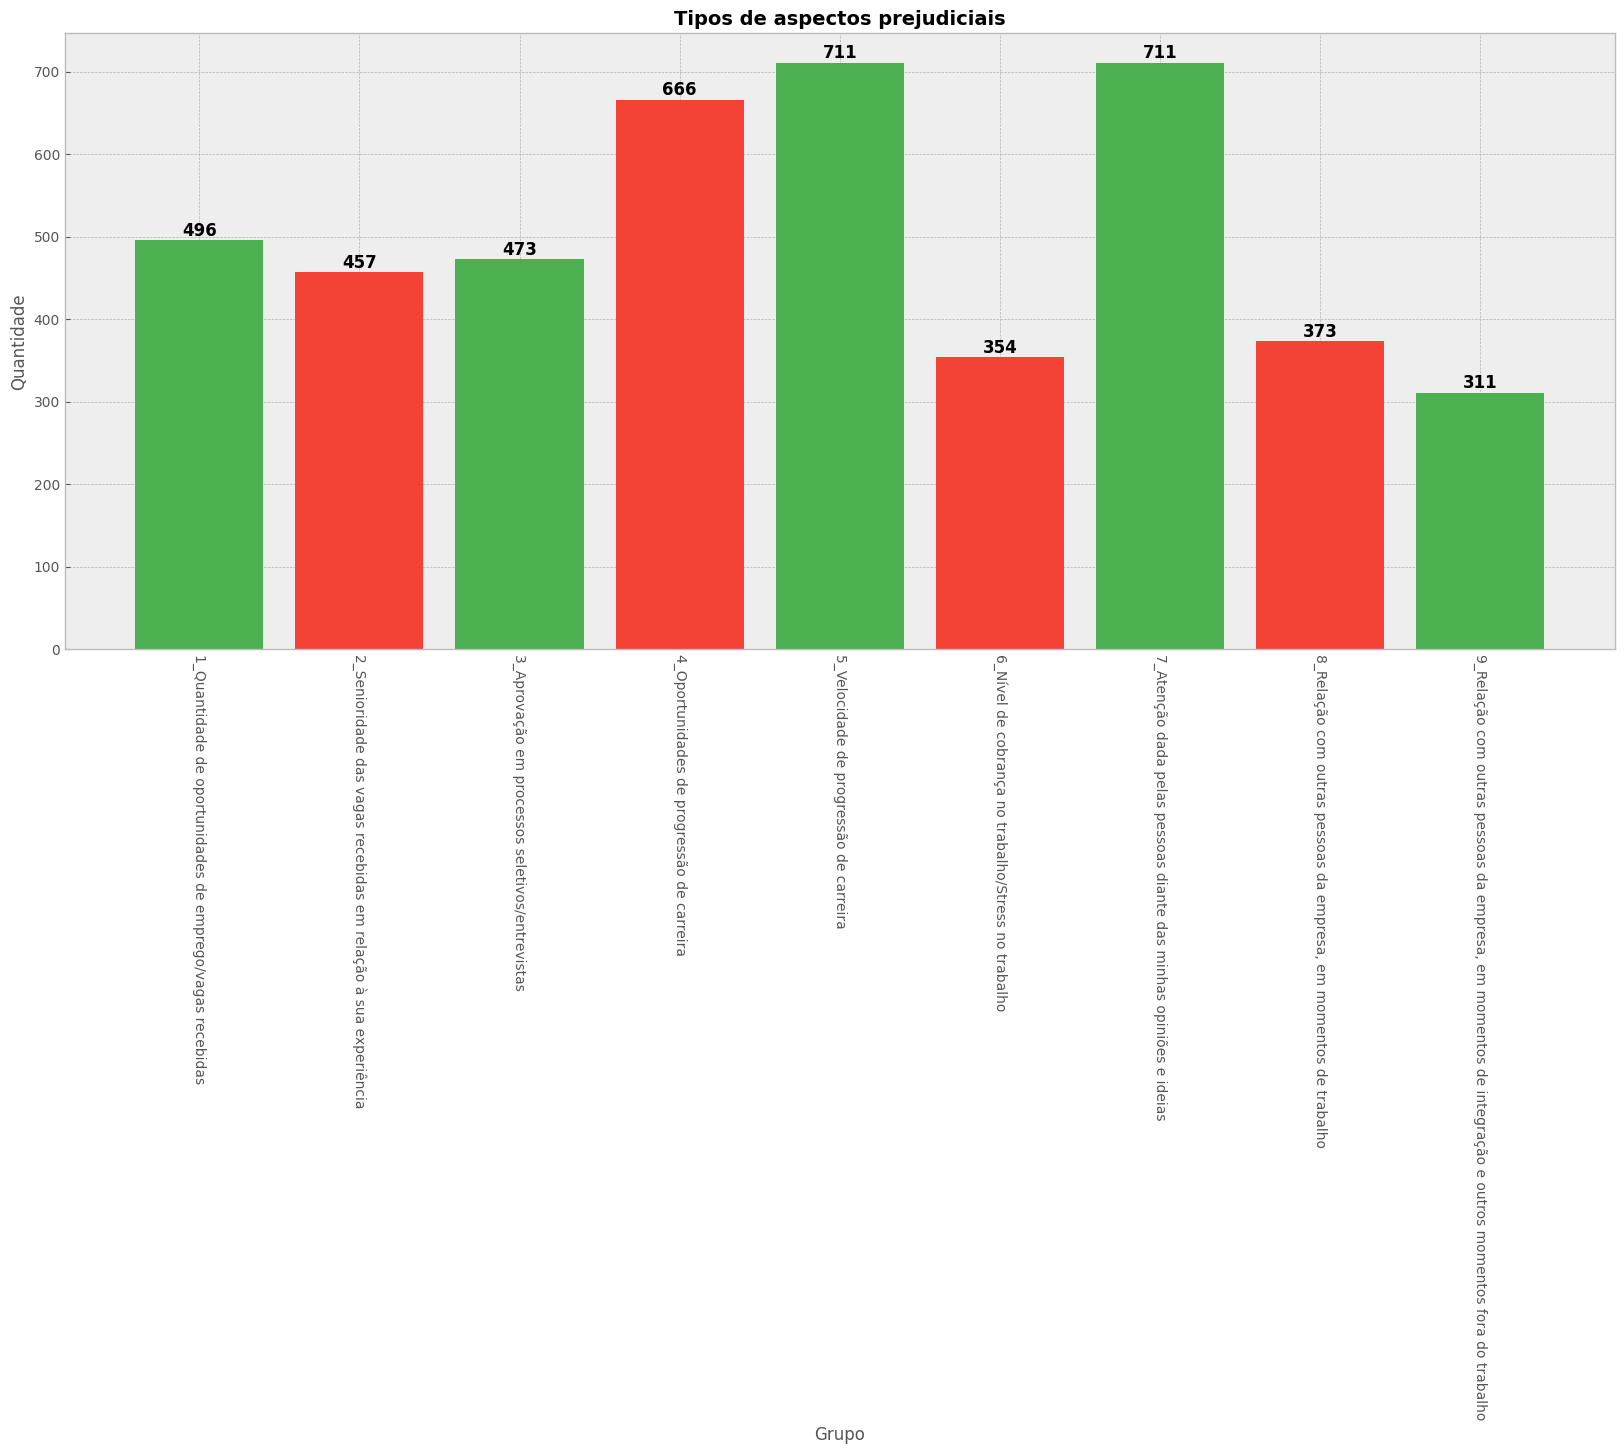

In [38]:

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(20, 8))


# Cria as barras
barras = ax.bar(categorias_1, valores_resposta_1, color=['#4CAF50', '#F44336'])

# Adiciona os valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{int(altura)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Títulos e rótulos
ax.set_title('Tipos de aspectos prejudiciais', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xlabel('Grupo', fontsize=12)

# Ajuste fino de layout
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

Aqui temos uma informação muito importante sobre o projeto, uma pessoa pode se sentir prejudica por diferentes aspectos, os aspectos a qual as pessoas mais se sentem prejudicas são a oportunidade e a velocidade na progressão de carreira e a atenção dada pelas pessoas diante suas opniões e ideias. Vamos ver agora um comparativo 

In [39]:
total_pessoas = len(df)

for coluna in colunas_1f_dummies:
    percentual = (df[coluna].sum() / total_pessoas) * 100
    nome_formatado = coluna.replace('1.f.', '')
    print(f"O valor em % para '{nome_formatado}': {percentual:.2f}%")


O valor em % para '1_Quantidade de oportunidades de emprego/vagas recebidas': 38.90%
O valor em % para '2_Senioridade das vagas recebidas em relação à sua experiência': 35.84%
O valor em % para '3_Aprovação em processos seletivos/entrevistas': 37.10%
O valor em % para '4_Oportunidades de progressão de carreira': 52.24%
O valor em % para '5_Velocidade de progressão de carreira': 55.76%
O valor em % para '6_Nível de cobrança no trabalho/Stress no trabalho': 27.76%
O valor em % para '7_Atenção dada pelas pessoas diante das minhas opiniões e ideias': 55.76%
O valor em % para '8_Relação com outras pessoas da empresa, em momentos de trabalho': 29.25%
O valor em % para '9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho': 24.39%


Vamos dar uma olhada na coluna '1.e_experiencia_profissional_prejudicada' que relata os pontos que as pessoas se sentem prejudicadas

In [40]:
valores_1e = df['1.e_experiencia_profissional_prejudicada'].value_counts()
categorias_1e = df['1.e_experiencia_profissional_prejudicada'].unique()
print(valores_1e)
print(categorias_1e)

1.e_experiencia_profissional_prejudicada
sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero                                                                                                                                                                                              660
sim, acredito que a minha a experiência profissional seja afetada devido a minha cor/raça/etnia                                                                                                                                                                                                    402
sim, acredito que a minha a experiência profissional seja afetada devido a minha cor/raça/etnia, sim, acredito que a minha a experiência profissional seja afetada devido a minha identidade de gênero                                                                                              92
sim, acredito que minha experiência profissional seja afetada devido ao fa

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1666223747.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


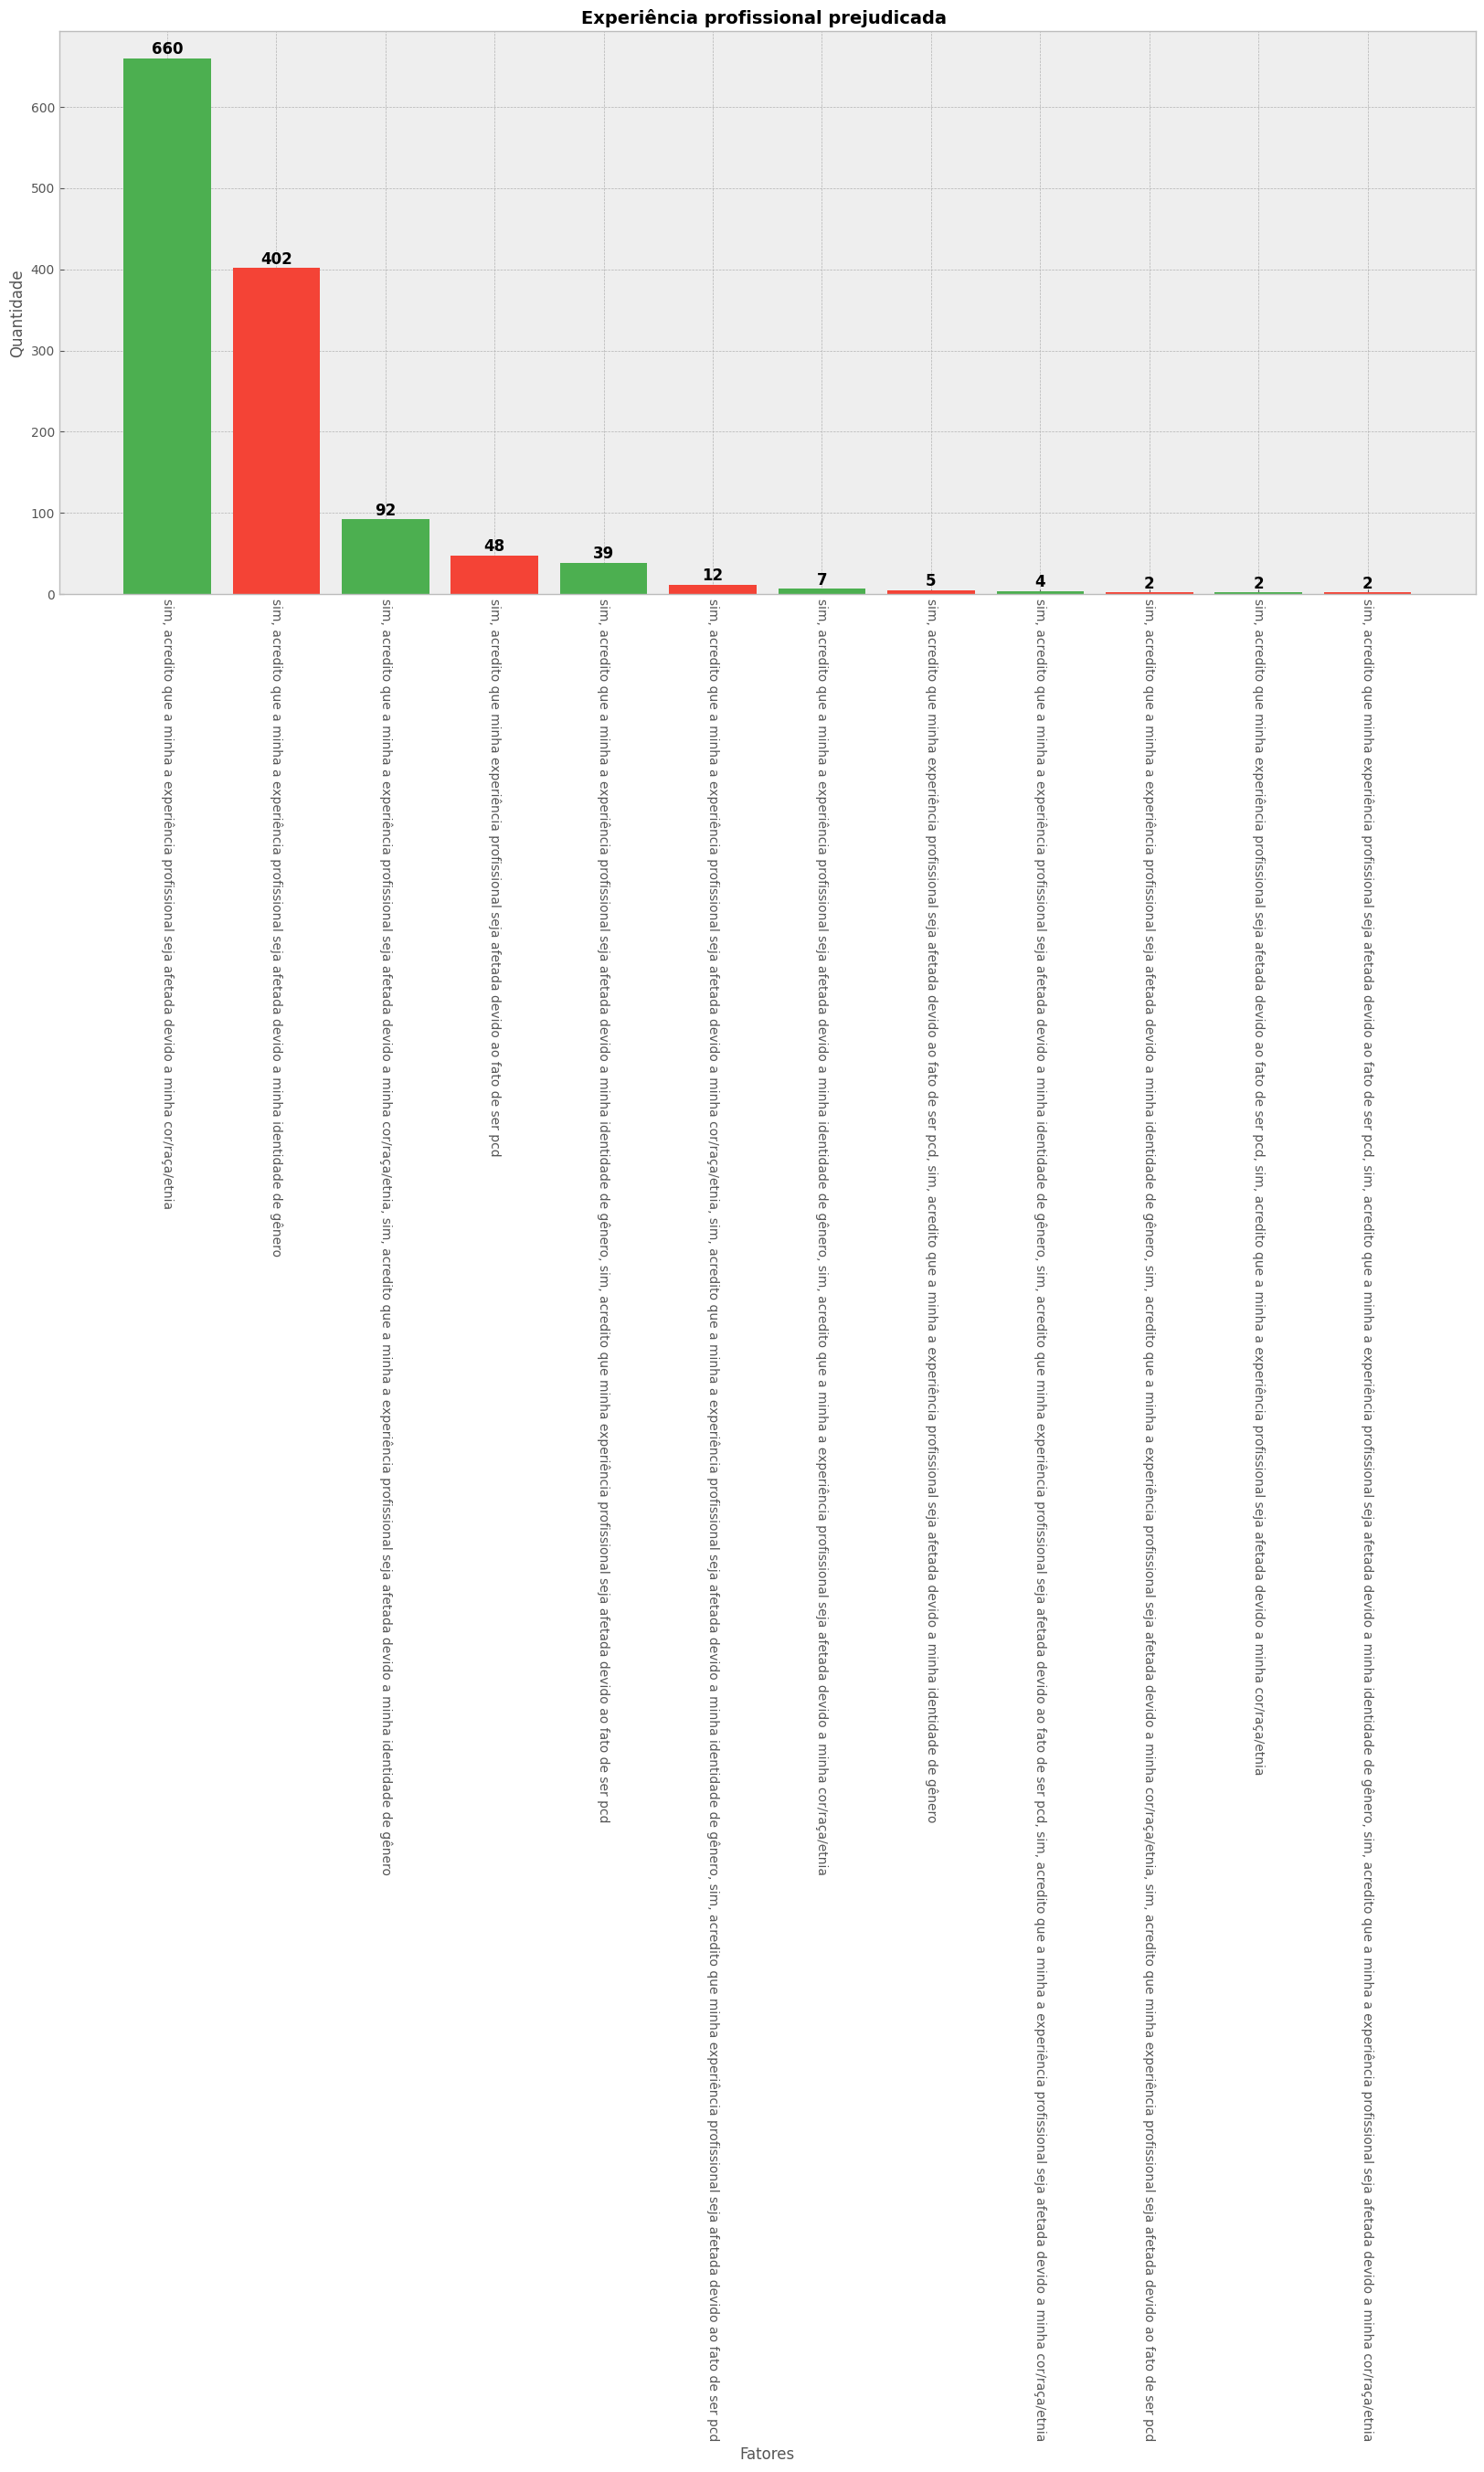

In [41]:
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(20, 8))


# Cria as barras
barras = ax.bar(categorias_1e, valores_1e, color=['#4CAF50', '#F44336'])

# Adiciona os valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{int(altura)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Títulos e rótulos
ax.set_title('Experiência profissional prejudicada ', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xlabel('Fatores', fontsize=12)

# Ajuste fino de layout
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

Esta visão não ficou muito clara pois ela é redundante, vamos utilizar as colunas dummies já disponíveis 

In [42]:
# Filtra as colunas dummies da 1.f (que começam com '1.f')
colunas_1e_dummies = [col for col in df.columns if col.startswith('1.e.') and col != '1.e_experiencia_profissional_prejudicada']
valores_resposta_1e_dummies = df[colunas_1e_dummies].sum().values
categorias_1e_dummies = [col.replace('1.e.', '') for col in colunas_1e_dummies]

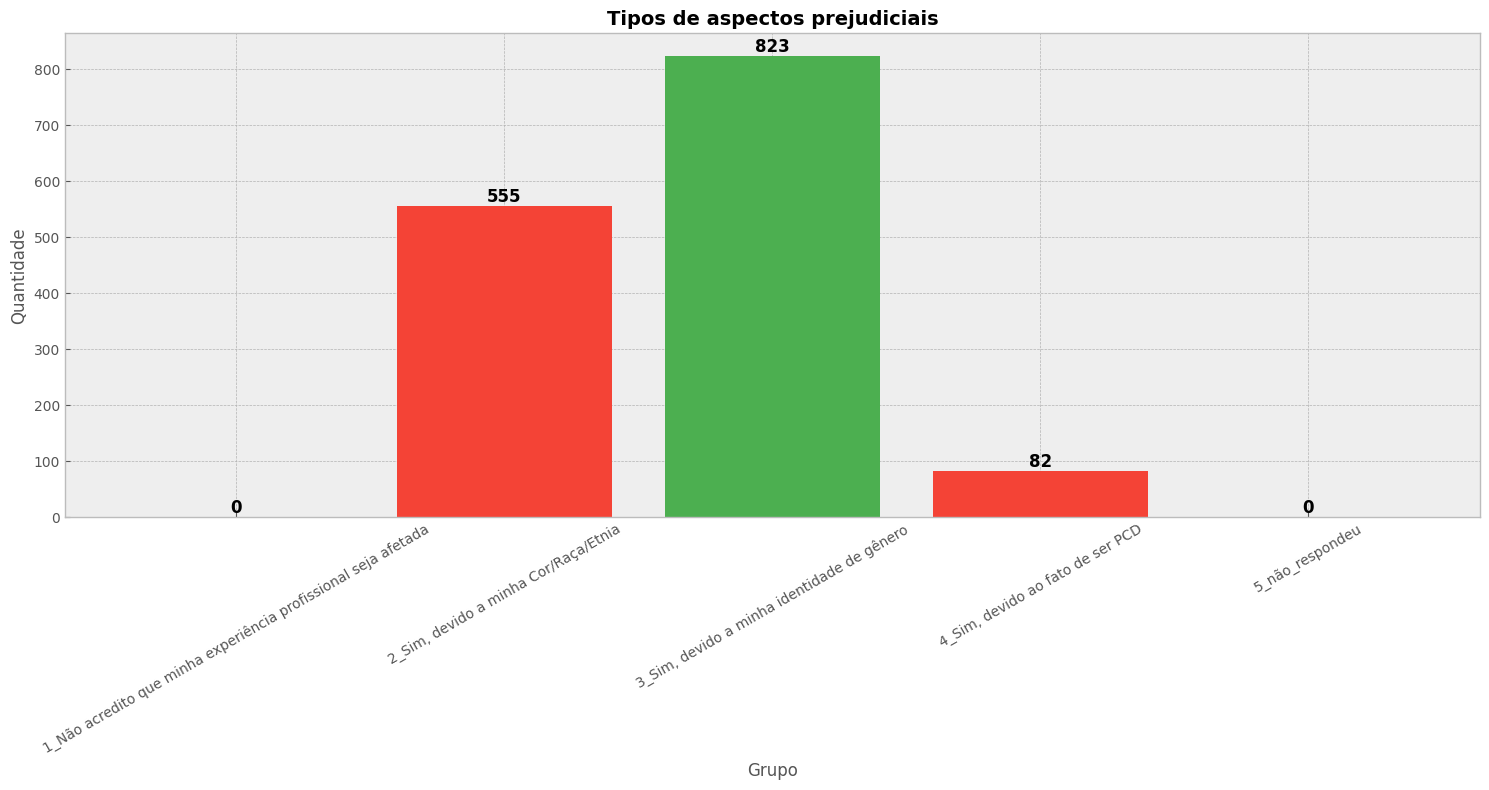

In [43]:
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15, 8))


# Cria as barras
barras = ax.bar(categorias_1e_dummies, valores_resposta_1e_dummies, color=['#4CAF50', '#F44336'])

# Adiciona os valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{int(altura)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Títulos e rótulos
ax.set_title('Tipos de aspectos prejudiciais', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xlabel('Grupo', fontsize=12)

# Ajuste fino de layout
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [44]:
total_pessoas = len(df)

for coluna in colunas_1e_dummies:
    percentual = (df[coluna].sum() / total_pessoas) * 100
    nome_formatado = coluna.replace('1.e.', '')
    print(f"O valor em % para '{nome_formatado}': {percentual:.2f}%")

O valor em % para '1_Não acredito que minha experiência profissional seja afetada': 0.00%
O valor em % para '2_Sim, devido a minha Cor/Raça/Etnia': 43.53%
O valor em % para '3_Sim, devido a minha identidade de gênero': 64.55%
O valor em % para '4_Sim, devido ao fato de ser PCD': 6.43%
O valor em % para '5_não_respondeu': 0.00%


Agora entendemos que os fatores principais para uma pessoa sentir sua experiÊncia profissional afetada é pelo fator social/cultural.

O Próximo passo é cruzar essas pessoas com os fatores que elas dizem se sentir prejudicadas e utilizando a coluna '1.f_aspectos_prejudicados' vamos entender o que realmente afeta cada tipo de pessoa.

Vamos criar funções para plottar diferentes gráficos e analisar os principais fatores

In [ ]:
def plot_aspectos_por_categoria(df, coluna_categoria, prefixo_dummies='1.f.', excluir_coluna=None):
    
    # Esta função vai gerar gráficos de barras para colunas dummies prefixadas, separando pelos valores da coluna de categoria.
    # Os parâmetros são:
    # - df: DataFrame
    # - coluna_categoria: coluna de segmentação 
    # - prefixo_dummies: prefixo das colunas dummy
    # - excluir_coluna: coluna a ser ignorada
    # 
    colunas_dummies = [col for col in df.columns if col.startswith(prefixo_dummies)]
    if excluir_coluna:
        colunas_dummies = [col for col in colunas_dummies if col != excluir_coluna]

    categorias = df[coluna_categoria].dropna().unique()
    n = len(colunas_dummies)
    cols = 3
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, coluna in enumerate(colunas_dummies):
        valores = [df[df[coluna_categoria] == cat][coluna].sum() for cat in categorias]
        nome_aspecto = coluna.replace(prefixo_dummies, '')

        ax = axes[i]
        ax.bar(categorias, valores, color='skyblue')
        ax.set_title(nome_aspecto, fontsize=7)
        ax.set_ylabel('Quantidade')
        ax.set_xticklabels(categorias, rotation=17)

        for j, v in enumerate(valores):
            ax.text(j, v + 0.5, str(int(v)), ha='center', va='bottom', fontsize=8)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_distribuicao_por_categoria(df, coluna_categoria, cmap='Set3'):
    # Esta vai gerar gráfico de barras com a contagem de cada valor único da coluna escolhida.
    # Os parâmetros são:
    # - df: DataFrame
    # - coluna_categoria: coluna categórica para agrupar (ex: 'gênero', 'cor', 'área')
    # - cmap: colormap do Matplotlib (ex: 'Set3', 'tab10', 'Pastel1')

    valores = df[coluna_categoria].value_counts()
    categorias = valores.index
    contagens = valores.values

    # Gera uma paleta de cores do colormap escolhido
    cmap = cm.get_cmap(cmap, len(categorias))
    cores = [cmap(i) for i in range(len(categorias))]

    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(8, 6))

    barras = ax.bar(categorias, contagens, color=cores)

    for barra in barras:
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{int(altura)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax.set_title(f'Distribuição por {coluna_categoria}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Quantidade', fontsize=12)
    ax.set_xlabel(coluna_categoria, fontsize=12)

    plt.tight_layout()
    plt.show()

In [72]:
def aspectos_numeros(df, coluna_categoria, prefixo_dummies='1.f.', excluir_coluna=None):
    # Função que vai mostrar a % de pessoas que tem aspectos que foram prejudicados devido a algum problema
    # Vale ressaltar que a função mostra a % comparando com o número de pessoas que relataram algum aspecto,
    # logo se o aspecto foi relatado mas pouco citado sua % será baixa
    # Os parâmetros são:
    # - df: DataFrame
    # - coluna_categoria: coluna categórica para agrupar (
    # - prefixo_dummies: prefixo das colunas dummy
    # - excluir_coluna: coluna a ser ignorada
    colunas_dummies = [col for col in df.columns if col.startswith(prefixo_dummies)]
    if excluir_coluna:
        colunas_dummies = [col for col in colunas_dummies if col != excluir_coluna]

    categorias = df[coluna_categoria].dropna().unique()
    total_geral = df.shape[0]  # total de pessoas no geral

    resultados = []
    for col in colunas_dummies:
        partes = []
        for cat in categorias:
            df_cat = df[df[coluna_categoria] == cat]
            contagem = df_cat[col].sum()
            porcentagem = (contagem / total_geral) * 100
            partes.append(f"{cat}: {porcentagem:.2f}%")
        linha = f"{col.replace(prefixo_dummies, '')}: " + ' | '.join(partes)
        resultados.append(linha)

    for linha in resultados:
        print(linha)


            

Agora que definimos as funções vamos ver por gênero, cor e pcd

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\A

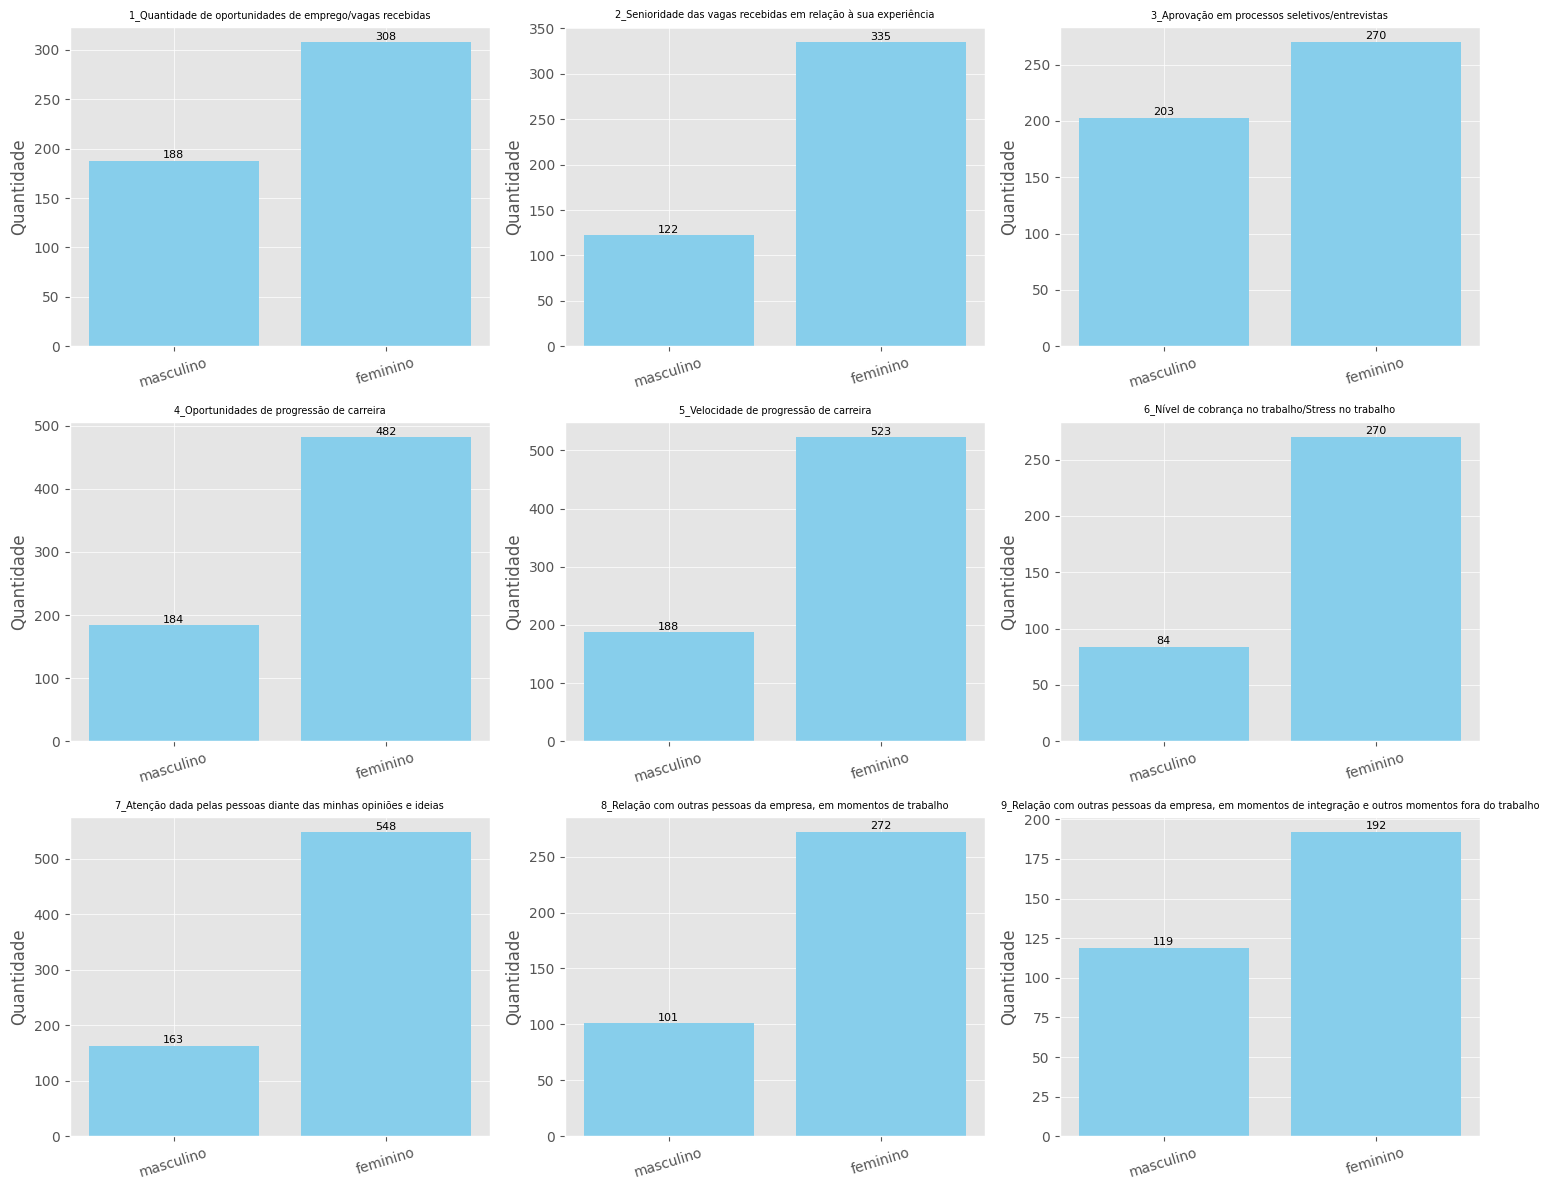

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\618634545.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap, len(categorias))


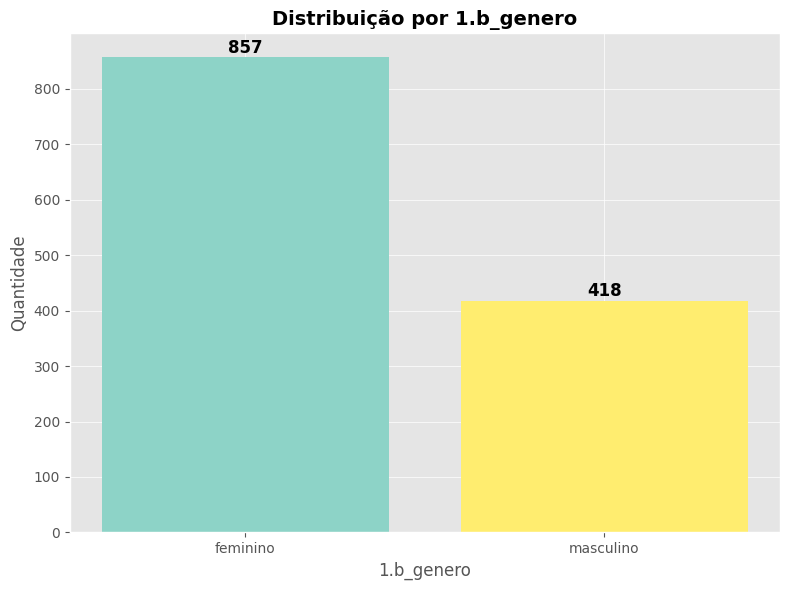

1_Quantidade de oportunidades de emprego/vagas recebidas: masculino: 14.75% | feminino: 24.16%
2_Senioridade das vagas recebidas em relação à sua experiência: masculino: 9.57% | feminino: 26.27%
3_Aprovação em processos seletivos/entrevistas: masculino: 15.92% | feminino: 21.18%
4_Oportunidades de progressão de carreira: masculino: 14.43% | feminino: 37.80%
5_Velocidade de progressão de carreira: masculino: 14.75% | feminino: 41.02%
6_Nível de cobrança no trabalho/Stress no trabalho: masculino: 6.59% | feminino: 21.18%
7_Atenção dada pelas pessoas diante das minhas opiniões e ideias: masculino: 12.78% | feminino: 42.98%
8_Relação com outras pessoas da empresa, em momentos de trabalho: masculino: 7.92% | feminino: 21.33%
9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho: masculino: 9.33% | feminino: 15.06%


In [73]:
# Vendo os gráficos por Genêro
plot_aspectos_por_categoria(df, coluna_categoria='1.b_genero')
plot_distribuicao_por_categoria(df, coluna_categoria='1.b_genero')
aspectos_numeros(df, coluna_categoria='1.b_genero')

In [ ]:


def grafico_respostas_por_categoria(df_todos, coluna_categoria, prefixo_dummies='1.f.', excluir_coluna='1.f.10_não_respondeu'):
    # Seleciona as colunas de aspectos
    colunas_dummies = [col for col in df_todos.columns if col.startswith(prefixo_dummies)]
    if excluir_coluna in colunas_dummies:
        colunas_dummies.remove(excluir_coluna)

    # Cria coluna booleana: True se respondeu ao menos um aspecto
    df_todos = df_todos.copy()
    df_todos['respondeu'] = df_todos[colunas_dummies].sum(axis=1) > 0

    # Agrupa por categoria e se respondeu ou não
    contagem = df_todos.groupby([coluna_categoria, 'respondeu']).size().unstack(fill_value=0)

    # Garante colunas True e False
    contagem[True] = contagem.get(True, 0)
    contagem[False] = contagem.get(False, 0)

    contagem = contagem.sort_index()
    categorias = contagem.index
    nao_respondeu = contagem[False]
    respondeu = contagem[True]

    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(categorias, nao_respondeu, label='Não respondeu', color='skyblue')
    plt.bar(categorias, respondeu, bottom=nao_respondeu, label='Respondeu', color='salmon')
    plt.title(f'Respostas válidas por categoria - {coluna_categoria}')
    plt.ylabel('Quantidade de pessoas')
    plt.xlabel(coluna_categoria)
    plt.xticks(rotation=30)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Tabela abaixo do gráfico
    print("\n📊 Quantidade de respostas por categoria:")
    tabela = pd.DataFrame({
        'Não respondeu': nao_respondeu,
        'Respondeu': respondeu,
        'Total': nao_respondeu + respondeu
    })
    display(tabela)


In [ ]:

contagem_total = df_todos['1.b_genero'].value_counts()
contagem_respondentes = df['1.b_genero'].value_counts()

for cat, total_cat in contagem_total.items():
    respondeu = contagem_respondentes.get(cat, 0)
    perc_respondeu = respondeu / total_cat * 100 if total_cat else 0
    print(f"{cat}: {respondeu} responderam de {total_cat} ({perc_respondeu:.2f}%)")

masculino: 418 responderam de 3948 (10.59%)
feminino: 857 responderam de 1215 (70.53%)


Nesta parte conseguimos ver bem o número e % de genêros que são afetados, vamos olhar principalmente para a  Velocidade na progressão de carreira e Atenção dada pelas pessoas diante das minhas opiniões e ideias. Notamos que os dois indicadores tem mais de 40% de mulheres citando-os (claro que podem ser as mesmas), isso pode nos indicar riscos desse grupo no trabalho e também podemos relacionar os dois - Será que as mulheres não progridem tanto na área pois não são dadas devidas atenções as suas opniões? - São perguntas como essa que esclarecem e mostram o problema real da área de dados. 

Além disto, notamos que 70% das mulheres que participaram do questionário responderam, o que levanta ainda mais espaço para pensarmos 

Vamos prosseguir com cor e pdc!

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\A

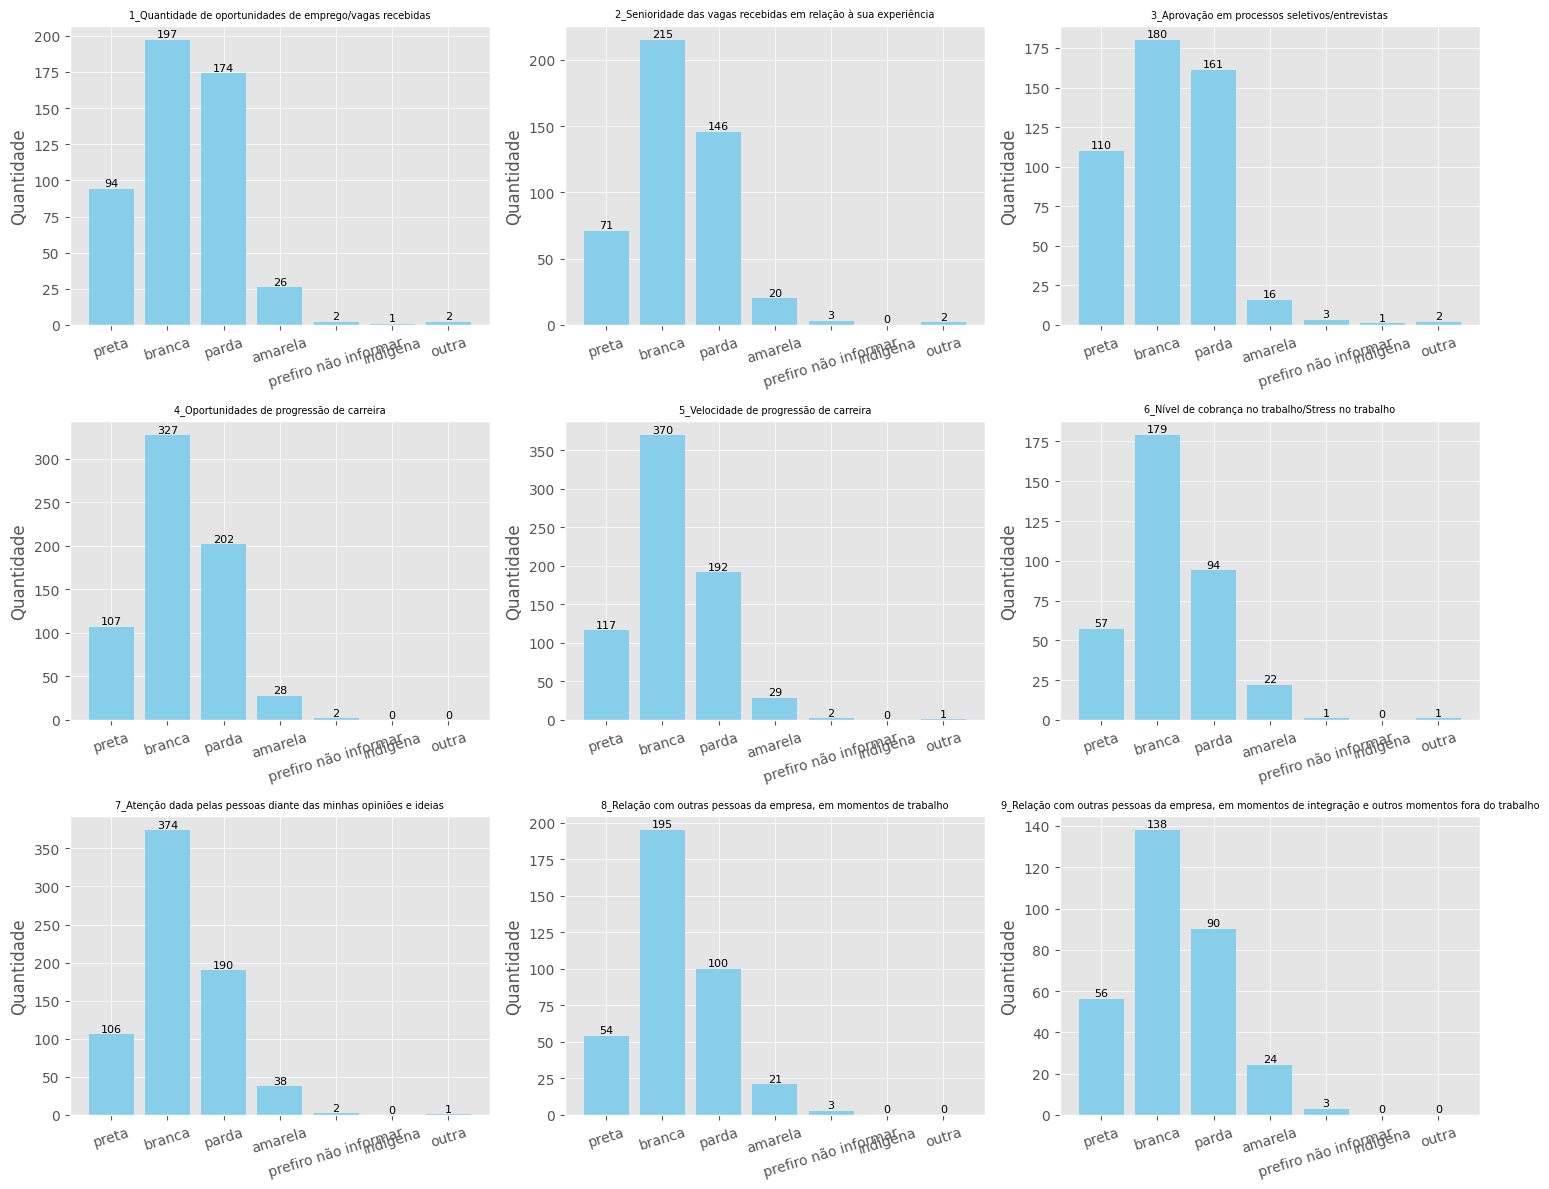

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\618634545.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap, len(categorias))


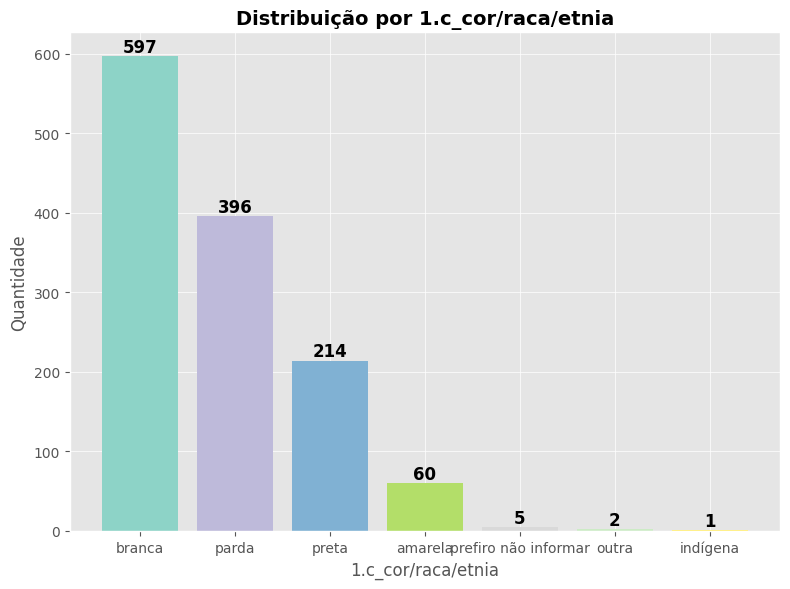

1_Quantidade de oportunidades de emprego/vagas recebidas: preta: 7.37% | branca: 15.45% | parda: 13.65% | amarela: 2.04% | prefiro não informar: 0.16% | indígena: 0.08% | outra: 0.16%
2_Senioridade das vagas recebidas em relação à sua experiência: preta: 5.57% | branca: 16.86% | parda: 11.45% | amarela: 1.57% | prefiro não informar: 0.24% | indígena: 0.00% | outra: 0.16%
3_Aprovação em processos seletivos/entrevistas: preta: 8.63% | branca: 14.12% | parda: 12.63% | amarela: 1.25% | prefiro não informar: 0.24% | indígena: 0.08% | outra: 0.16%
4_Oportunidades de progressão de carreira: preta: 8.39% | branca: 25.65% | parda: 15.84% | amarela: 2.20% | prefiro não informar: 0.16% | indígena: 0.00% | outra: 0.00%
5_Velocidade de progressão de carreira: preta: 9.18% | branca: 29.02% | parda: 15.06% | amarela: 2.27% | prefiro não informar: 0.16% | indígena: 0.00% | outra: 0.08%
6_Nível de cobrança no trabalho/Stress no trabalho: preta: 4.47% | branca: 14.04% | parda: 7.37% | amarela: 1.73% | p

In [74]:
# Vendo os gráficos por Cor/raça/ etnia
plot_aspectos_por_categoria(df, coluna_categoria='1.c_cor/raca/etnia')
plot_distribuicao_por_categoria(df, coluna_categoria='1.c_cor/raca/etnia')
aspectos_numeros(df, coluna_categoria='1.c_cor/raca/etnia')

Aqui observamos que, no recorte por cor/raça/etnia, pessoas brancas apresentam maior percentual de oportunidades recebidas.
Essa disparidade pode ser explicada por uma combinação de fatores estruturais e sociais, como: 
Maior acesso à educação de qualidade;

Presença consolidada em redes profissionais e acadêmicas;

Barreiras históricas enfrentadas por grupos racializados no mercado de trabalho;

Falta de políticas afirmativas ou incentivos à diversidade;

Reproduções de vieses inconscientes nas contratações e processos seletivos.

Também é possível que exista menor presença de pessoas negras, indígenas ou de outras etnias na área analisada, seja por desinteresse motivado pela falta de representatividade ou pela ausência de incentivo à inserção profissional nesse setor.

Esse cenário reforça a importância de ações afirmativas, programas de inclusão e investimentos em capacitação para equilibrar as oportunidades e promover um mercado mais diverso e justo.


Vamos analisar a % de pessoas total que participaram para vermos quantos pessoas que não são brancas participaram da enquete e quantas relataram problemas


In [101]:
contagem_total = df_todos['1.c_cor/raca/etnia'].value_counts()
contagem_respondentes = df['1.c_cor/raca/etnia'].value_counts()

for cat, total_cat in contagem_total.items():
    respondeu = contagem_respondentes.get(cat, 0)
    perc_respondeu = respondeu / total_cat * 100 if total_cat else 0
    print(f"{cat}: {respondeu} responderam de {total_cat} ({perc_respondeu:.2f}%)")


branca: 597 responderam de 3460 (17.25%)
parda: 396 responderam de 1165 (33.99%)
preta: 214 responderam de 343 (62.39%)
amarela: 60 responderam de 152 (39.47%)
prefiro não informar: 5 responderam de 28 (17.86%)
indígena: 1 responderam de 10 (10.00%)
outra: 2 responderam de 5 (40.00%)


Vamos prosseguir com a coluna 1.d_pcd

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\1982259518.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorias, rotation=17)
C:\Users\GUILHERME\A

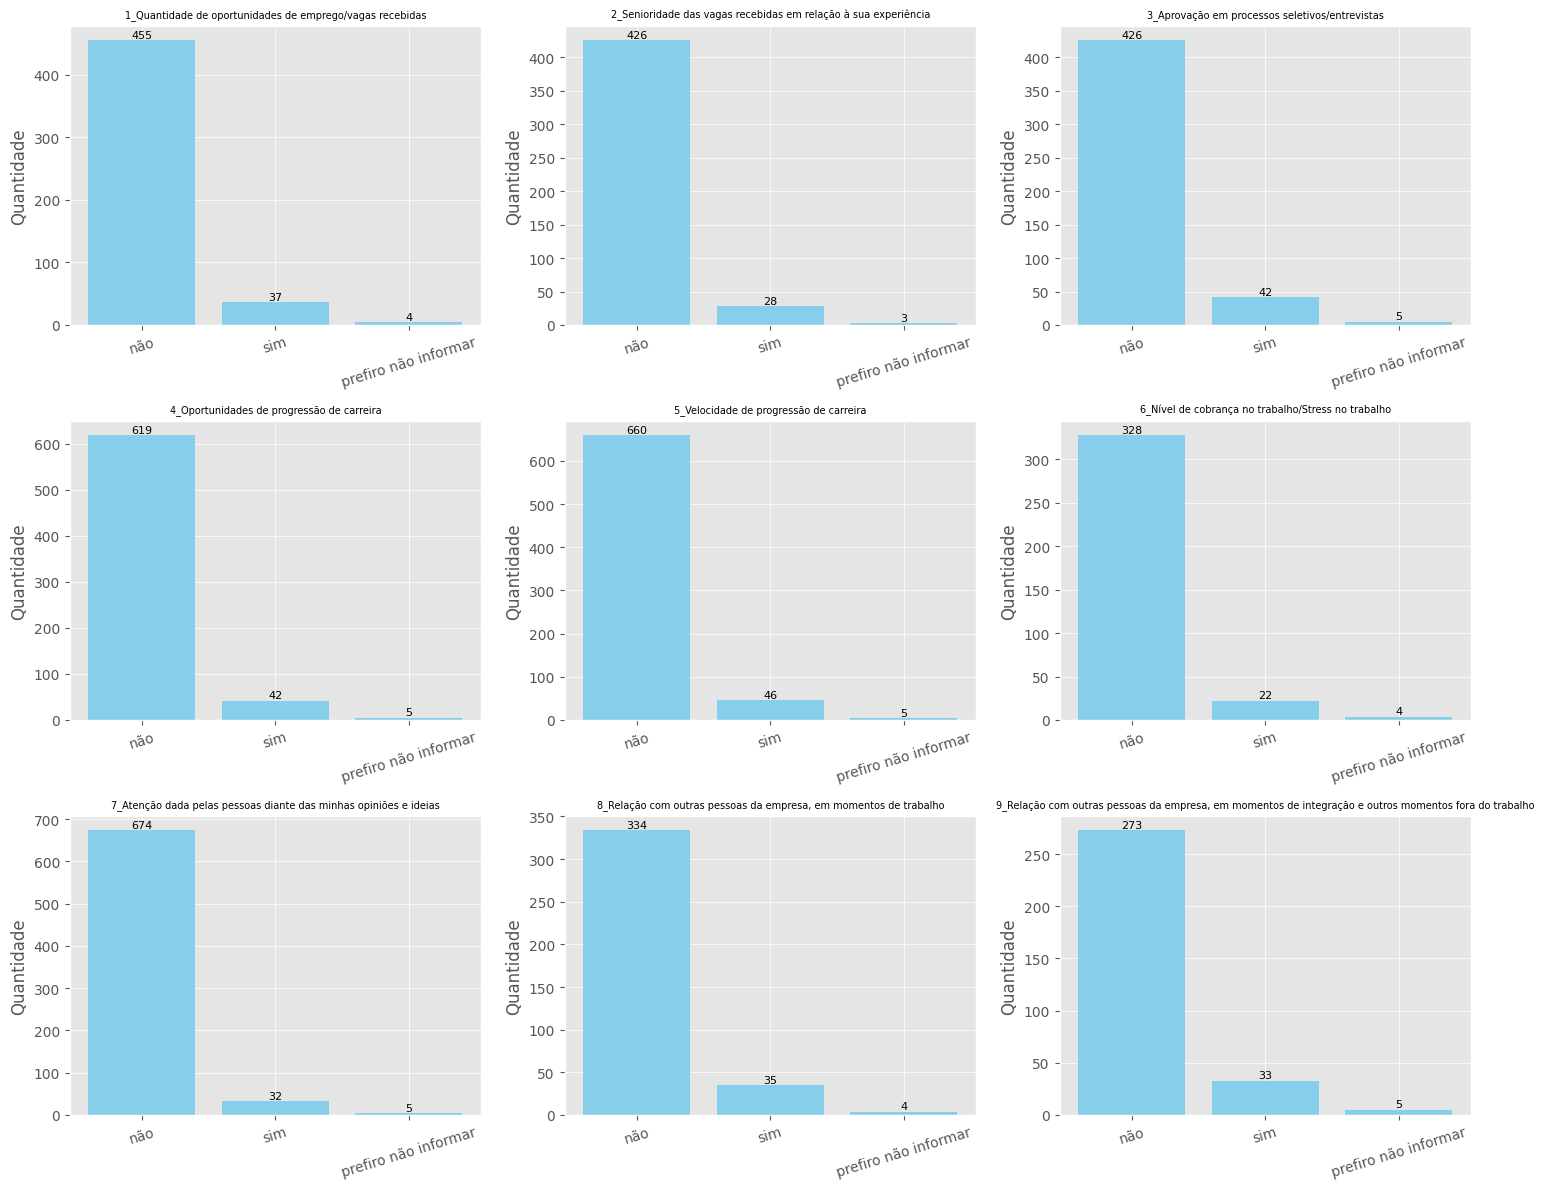

C:\Users\GUILHERME\AppData\Local\Temp\ipykernel_5776\618634545.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap, len(categorias))


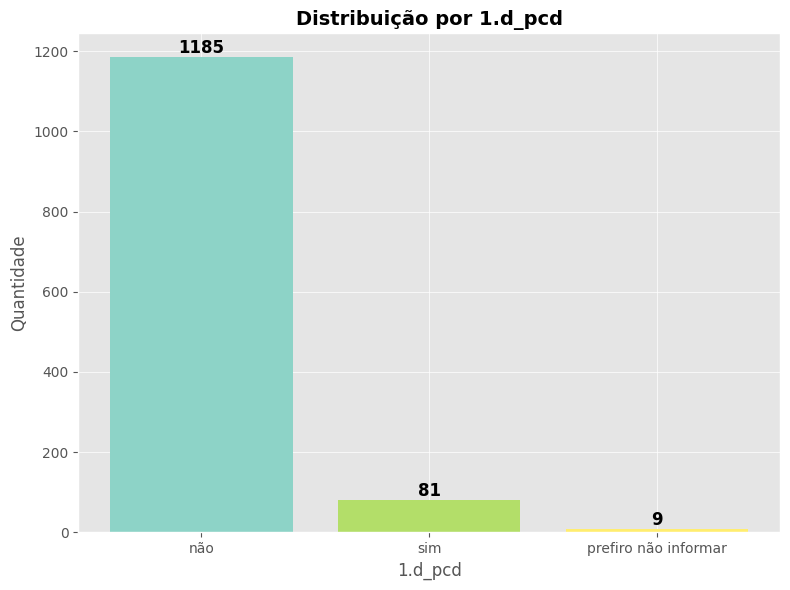

1_Quantidade de oportunidades de emprego/vagas recebidas: não: 35.69% | sim: 2.90% | prefiro não informar: 0.31%
2_Senioridade das vagas recebidas em relação à sua experiência: não: 33.41% | sim: 2.20% | prefiro não informar: 0.24%
3_Aprovação em processos seletivos/entrevistas: não: 33.41% | sim: 3.29% | prefiro não informar: 0.39%
4_Oportunidades de progressão de carreira: não: 48.55% | sim: 3.29% | prefiro não informar: 0.39%
5_Velocidade de progressão de carreira: não: 51.76% | sim: 3.61% | prefiro não informar: 0.39%
6_Nível de cobrança no trabalho/Stress no trabalho: não: 25.73% | sim: 1.73% | prefiro não informar: 0.31%
7_Atenção dada pelas pessoas diante das minhas opiniões e ideias: não: 52.86% | sim: 2.51% | prefiro não informar: 0.39%
8_Relação com outras pessoas da empresa, em momentos de trabalho: não: 26.20% | sim: 2.75% | prefiro não informar: 0.31%
9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho: não: 21.41% | sim: 2

In [75]:
# Vendo os gráficos por Cor/raça/ etnia
plot_aspectos_por_categoria(df, coluna_categoria='1.d_pcd')
plot_distribuicao_por_categoria(df, coluna_categoria='1.d_pcd')
aspectos_numeros(df, coluna_categoria='1.d_pcd')

Neste caso acontece o mesmo que o anteriro, temos muito poucos representantes de pessoas com deficiência 

Nesse plot identificamos que todos os aspectos prejudiciais tem em sua maioria o genero Feminino, outras identidades de genêro que haviam no Dataframe foram excluidas pois seu valor era minimo e insuficiente para fazer uma análise mais detalhada do problema, agora vamos ver o mesmo set de gráfico aplicados a raça/cor/etnia e pcd 

Aqui entendemos que a maioria das pessoas que se sentem prejudicadas são mulheres brancas que não são pcd, isso indica alguns fatores muito importante

* O Mercado não está aceitando PCDS

* Mulheres são o público mais afetados em todos os aspectos seja em velocidade de carreira até problema com relacionamento entre colegas 

* 